In [327]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [328]:
df=pd.read_excel('./school_arrest_data.xlsx')

In [329]:
df.head()

,Charge,Year,Month,Age,Sex,Race,Ethnicity,School,Student,Category,Time,Location,Region
0,VANDALIZE PROPERTY c266 Â§126A,2020,9,17,M,W,H,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River
1,BURGLARIOUS INSTRUMENT POSSESS,2020,9,17,M,W,H,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River
2,ATTEMPT TO COMMIT CRIME,2020,9,17,M,W,H,WILEY SCHOOL,N,M,2015,NORTH MAIN,Fall River
3,VANDALIZE PROPERTY c266 Â§126A,2020,9,16,M,W,N,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River
4,BURGLARIOUS INSTRUMENT POSSESS,2020,9,16,M,W,N,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River


In [330]:
# Define the mapping dictionary for ethnicity conversion
ethnicity_mapping = {
    'w': 'White',
    'white': 'White',
    'b': 'Black',
    'black': 'Black',
    'native american': 'Non Hispanic',
    'other': "Non Hispanic",
    'not of hispanic origin': 'Non Hispanic',
    'non-hispanic': 'Non Hispanic',
    'non hispanic': 'Non Hispanic',
    'h': 'Hispanic',
    'hispanic origin': 'Hispanic',
    'hispanic': 'Hispanic',
    'indian': 'Asian',
    'asian': 'Asian'
}
df['Race'] = df['Race'].str.lower()
# Apply the mapping to the 'Ethnicity' column
df['Ethnicity'] = df['Race'].map(ethnicity_mapping).fillna('Unknown')

# Print the updated DataFrame
df.head()

,Charge,Year,Month,Age,Sex,Race,Ethnicity,School,Student,Category,Time,Location,Region
0,VANDALIZE PROPERTY c266 Â§126A,2020,9,17,M,w,White,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River
1,BURGLARIOUS INSTRUMENT POSSESS,2020,9,17,M,w,White,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River
2,ATTEMPT TO COMMIT CRIME,2020,9,17,M,w,White,WILEY SCHOOL,N,M,2015,NORTH MAIN,Fall River
3,VANDALIZE PROPERTY c266 Â§126A,2020,9,16,M,w,White,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River
4,BURGLARIOUS INSTRUMENT POSSESS,2020,9,16,M,w,White,WILEY SCHOOL,N,F,2015,NORTH MAIN,Fall River


In [331]:
df.Ethnicity.unique()

array(['White', 'Black', 'Unknown', 'Hispanic', 'Asian', 'Non Hispanic'],
      dtype=object)

In [332]:
print(df[df['Ethnicity'] == 'indian'])

Empty DataFrame
Columns: [Charge, Year, Month, Age, Sex, Race, Ethnicity, School, Student, Category, Time, Location, Region]
Index: []


In [333]:
df['Year'].unique()

array([2020, 2021, 2018, 2019, 2022, 'Missing', 2001, 2012], dtype=object)

In [334]:
df = df[df.Region != "Missing"]
df = df[df.Region != "missing"]

In [335]:
df = df[df.Year != "Missing"]
df = df[df.Year != "missing"]
df = df[df.Year != 2012]
df = df[df.Year != 2001]

In [336]:
df = df[df.Age != "Missing"]
df = df[df.Age != "missing"]

In [337]:
df['Age'] = df['Age'].astype(int)
df = df[df.Age < 22]

In [338]:
df[df['Region']=="Boston"]

,Charge,Year,Month,Age,Sex,Race,Ethnicity,School,Student,Category,Time,Location,Region
2397,B & E - Trespassing,2018,9,21,Unknown,unknown,Unknown,Missing,Missing,Missing,15:32:00,Missing,Boston
2399,Drug Possession - Possession of Class A,2018,9,21,Unknown,unknown,Unknown,Missing,Missing,Missing,15:32:00,Missing,Boston
2401,"Robbery - Armed, Street or Alley",2018,9,14,Male,white,White,Missing,Missing,Missing,18:40:00,Missing,Boston
2402,"Robbery - Armed, Street or Alley",2018,9,17,Male,white,White,Missing,Missing,Missing,18:40:00,Missing,Boston
2403,"Robbery - Armed, Street or Alley",2018,9,16,Male,black,Black,Missing,Missing,Missing,18:40:00,Missing,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,ASSAULT W/DANGEROUS WEAPON c265.15B(b),2022,5,14,Female,black,Black,Missing,Missing,Missing,15:14:00,Missing,Boston
2817,ASSAULT W/DANGEROUS WEAPON c265.15B(b),2022,5,18,Female,black,Black,Missing,Missing,Missing,15:14:00,Missing,Boston
2836,ASSAULT W/DANGEROUS WEAPON c265.15B(b),2022,6,15,Male,white,White,Missing,Missing,Missing,20:10:00,Missing,Boston
2837,ASSAULT W/DANGEROUS WEAPON c265.15B(b),2022,6,14,Male,white,White,Missing,Missing,Missing,20:10:00,Missing,Boston


In [339]:
df['Region'].unique()

array(['Fall River', 'Methuen', 'Quincy', 'Revere', 'Somerville', 'MA',
       'Boston', 'Holyoke', 'Lowell', 'FALL RIVER', 'NEW BEDFORD',
       'Taunton', 'Lynn', 'SouthBridge', 'SOMERSET', 'WESTPORT',
       'COLUMBIA', 'SWANSEA', 'Fitchburg'], dtype=object)

In [340]:
df.rename(columns={'Region':'District Name'}, inplace=True)

In [342]:
df['District Name'] = df['District Name'].str.capitalize()

In [343]:
result1 = df.groupby(['Year','District Name'],as_index=False).count()

In [344]:
result1.head()

,Year,District Name,Charge,Month,Age,Sex,Race,Ethnicity,School,Student,Category,Time,Location
0,2018,Boston,46,46,46,46,46,46,46,46,46,46,46
1,2018,Fall river,93,93,93,93,93,93,93,93,93,93,93
2,2018,Fitchburg,4,4,4,4,4,4,4,4,4,4,4
3,2018,Holyoke,2,2,2,2,2,2,2,2,2,2,2
4,2018,Lowell,37,37,37,37,37,37,37,37,37,37,37


In [383]:
# Specify the folder path containing the Excel files
folder_path = './DESE School Discipline Data'

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        
        # Rename the 'Low Income' column to 'Economically Disadvantaged' if present
        if 'Low Income' in df.columns:
            df.rename(columns={'Low Income': 'Economically Disadvantaged'}, inplace=True)
        
        
        # Append the DataFrame to the list
        dfs.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [384]:
combined_df.count()
combined_df.head()

,School Year,District Code,District Name,School Code,School Name,Race/Ethnicity,Gender,Students w/ Disabilities,English Learners,Economically Disadvantaged,Total Disciplined,Total Eligible
0,2019,0,State Totals,0,State Totals,African American/Black,Female,With Disability,NaN,NaN,637.0,6867.0
1,2019,0,State Totals,0,State Totals,African American/Black,Female,NaN,English Learner,NaN,277.0,7109.0
2,2019,0,State Totals,0,State Totals,African American/Black,Female,NaN,NaN,Economically Disadvantaged,1745.0,26506.0
3,2019,0,State Totals,0,State Totals,African American/Black,Female,NaN,NaN,NaN,2401.0,44013.0
4,2019,0,State Totals,0,State Totals,African American/Black,Male,With Disability,NaN,NaN,1824.0,13193.0


In [385]:
combined_df.rename(columns={'School Year': 'Year'}, inplace=True)

In [386]:
combined_df["Students w/ Disabilities"]=combined_df['Students w/ Disabilities'].replace("With Disability",1)
combined_df["Students w/ Disabilities"]=combined_df['Students w/ Disabilities'].fillna(0)

In [387]:
combined_df["English Learners"]=combined_df['English Learners'].replace("English Learner",1)
combined_df["English Learners"]=combined_df['English Learners'].fillna(0)

In [388]:
combined_df["Economically Disadvantaged"]=combined_df['Economically Disadvantaged'].replace("Economically Disadvantaged",1)
combined_df["Economically Disadvantaged"]=combined_df['Economically Disadvantaged'].fillna(0)

In [389]:
combined_df["Total Eligible"]=combined_df['Total Eligible'].fillna(0)

In [392]:
df_c = combined_df[combined_df['Total Eligible'] == 0]

In [393]:
df_c.head()

,Year,District Code,District Name,School Code,School Name,Race/Ethnicity,Gender,Students w/ Disabilities,English Learners,Economically Disadvantaged,Total Disciplined,Total Eligible
114,2019,10000,Abington,10000,Abington,African American/Black,Female,1.0,0.0,0,NaN,0.0
115,2019,10000,Abington,10000,Abington,African American/Black,Female,0.0,1.0,0,NaN,0.0
118,2019,10000,Abington,10000,Abington,African American/Black,Male,1.0,0.0,0,NaN,0.0
119,2019,10000,Abington,10000,Abington,African American/Black,Male,0.0,1.0,0,NaN,0.0
122,2019,10000,Abington,10000,Abington,African American/Black,NaN,1.0,1.0,0,NaN,0.0


In [395]:
result_miss = combined_df.groupby(['District Name'],as_index=False)['Total Eligible'].count()

In [396]:
result_miss.head()

,District Name,Total Eligible
0,Abby Kelley Foster Charter Public (District),934
1,Abington,2415
2,Academy Of the Pacific Rim Charter Public (Dis...,780
3,Acton-Boxborough,4123
4,Acushnet,907


In [397]:
result_miss.to_excel("missing_data.xlsx")

In [189]:
combined_df.dropna(subset=['Total Eligible'], inplace=True)

In [190]:
combined_df.head()

,Year,District Code,District Name,School Code,School Name,Race/Ethnicity,Gender,Students w/ Disabilities,English Learners,Economically Disadvantaged,Total Disciplined,Total Eligible,Discipline Rate
0,2019,0,State Totals,0,State Totals,African American/Black,Female,1.0,0.0,0,637.0,6867.0,9.276249
1,2019,0,State Totals,0,State Totals,African American/Black,Female,0.0,1.0,0,277.0,7109.0,3.896469
2,2019,0,State Totals,0,State Totals,African American/Black,Female,0.0,0.0,1,1745.0,26506.0,6.583415
3,2019,0,State Totals,0,State Totals,African American/Black,Female,0.0,0.0,0,2401.0,44013.0,5.455206
4,2019,0,State Totals,0,State Totals,African American/Black,Male,1.0,0.0,0,1824.0,13193.0,13.825514


In [191]:
combined_df['Discipline Rate']= (combined_df['Total Disciplined']/combined_df['Total Eligible']) *100

In [279]:
# Create the Category column with default value as 0
combined_df['Category'] = 0

# Set Category as 1 where only Students w/ Disabilities is 1
combined_df.loc[(combined_df['Students w/ Disabilities'] == 1) & (combined_df['English Learners'] == 0) & (combined_df['Economically Disadvantaged'] == 0), 'Category'] = 1

# Set Category as 2 where only English Learners is 1
combined_df.loc[(combined_df['Students w/ Disabilities'] == 0) & (combined_df['English Learners'] == 1) & (combined_df['Economically Disadvantaged'] == 0), 'Category'] = 2

combined_df.loc[(combined_df['Students w/ Disabilities'] == 0) & (combined_df['English Learners'] == 0) & (combined_df['Economically Disadvantaged'] == 1), 'Category'] = 3

# Set Category as 3 where Students w/ Disabilities and English Learners are 1
combined_df.loc[(combined_df['Students w/ Disabilities'] == 1) & (combined_df['English Learners'] == 1) & (combined_df['Economically Disadvantaged'] == 0), 'Category'] = 4

# Set Category as 4 where English Learners and Economically Disadvantaged are 1
combined_df.loc[(combined_df['Students w/ Disabilities'] == 0) & (combined_df['English Learners'] == 1) & (combined_df['Economically Disadvantaged'] == 1), 'Category'] = 5

# Set Category as 5 where Students w/ Disabilities and Economically Disadvantaged are 1
combined_df.loc[(combined_df['Students w/ Disabilities'] == 1) & (combined_df['English Learners'] == 0) & (combined_df['Economically Disadvantaged'] == 1), 'Category'] = 6

# Set Category as 6 where all columns are 1
combined_df.loc[(combined_df['Students w/ Disabilities'] == 1) & (combined_df['English Learners'] == 1) & (combined_df['Economically Disadvantaged'] == 1), 'Category'] = 7

# Print the updated DataFrame
combined_df.head()

,Year,District Code,District Name,School Code,School Name,Race/Ethnicity,Gender,Students w/ Disabilities,English Learners,Economically Disadvantaged,Total Disciplined,Total Eligible,Discipline Rate,Category
0,2019,0,State Totals,0,State Totals,African American/Black,Female,1.0,0.0,0,637.0,6867.0,9.276249,1
1,2019,0,State Totals,0,State Totals,African American/Black,Female,0.0,1.0,0,277.0,7109.0,3.896469,2
2,2019,0,State Totals,0,State Totals,African American/Black,Female,0.0,0.0,1,1745.0,26506.0,6.583415,3
3,2019,0,State Totals,0,State Totals,African American/Black,Female,0.0,0.0,0,2401.0,44013.0,5.455206,0
4,2019,0,State Totals,0,State Totals,African American/Black,Male,1.0,0.0,0,1824.0,13193.0,13.825514,1


In [280]:
df1 = combined_df.copy()

In [281]:
ethnicity_mapping = {
    'white': 'White',
    'african american/black': 'Black',
    'multi-race, non-hispanic or latino': 'Non Hispanic',
    'hispanic or latino': 'Hispanic',
    'asian': 'Asian'
}

# Convert the "Race/Ethnicity" column to lowercase for case-insensitive mapping
df1['Race/Ethnicity'] = df1['Race/Ethnicity'].str.lower()

# Apply the race mapping to the 'Race/Ethnicity' column
df1['Race/Ethnicity'] = df1['Race/Ethnicity'].map(ethnicity_mapping).fillna('Unknown')


In [282]:
df1.head()

,Year,District Code,District Name,School Code,School Name,Race/Ethnicity,Gender,Students w/ Disabilities,English Learners,Economically Disadvantaged,Total Disciplined,Total Eligible,Discipline Rate,Category
0,2019,0,State Totals,0,State Totals,Black,Female,1.0,0.0,0,637.0,6867.0,9.276249,1
1,2019,0,State Totals,0,State Totals,Black,Female,0.0,1.0,0,277.0,7109.0,3.896469,2
2,2019,0,State Totals,0,State Totals,Black,Female,0.0,0.0,1,1745.0,26506.0,6.583415,3
3,2019,0,State Totals,0,State Totals,Black,Female,0.0,0.0,0,2401.0,44013.0,5.455206,0
4,2019,0,State Totals,0,State Totals,Black,Male,1.0,0.0,0,1824.0,13193.0,13.825514,1


In [286]:
df1["Gender"]=df1['Gender'].fillna("O")

In [287]:
df1 = df1[df1.Gender != "Female"]
df1 = df1[df1.Gender != "Male"]

In [288]:
df1

,Year,District Code,District Name,School Code,School Name,Race/Ethnicity,Gender,Students w/ Disabilities,English Learners,Economically Disadvantaged,Total Disciplined,Total Eligible,Discipline Rate,Category
8,2019,0,State Totals,0,State Totals,Black,O,1.0,1.0,0,264.0,2831.0,9.325327,4
9,2019,0,State Totals,0,State Totals,Black,O,1.0,0.0,1,1848.0,13611.0,13.577254,6
10,2019,0,State Totals,0,State Totals,Black,O,1.0,0.0,0,2462.0,20063.0,12.271345,1
11,2019,0,State Totals,0,State Totals,Black,O,0.0,1.0,1,769.0,10896.0,7.057636,5
12,2019,0,State Totals,0,State Totals,Black,O,0.0,1.0,0,1070.0,15705.0,6.813117,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805060,2020,39020000,TEC Connections Academy Commonwealth Virtual S...,39020900,TEC Connections Academy Commonwealth Virtual S...,White,O,0.0,0.0,1,13.0,771.0,1.686122,3
805073,2020,39020000,TEC Connections Academy Commonwealth Virtual S...,39020900,TEC Connections Academy Commonwealth Virtual S...,Unknown,O,1.0,1.0,1,0.0,14.0,0.000000,7
805074,2020,39020000,TEC Connections Academy Commonwealth Virtual S...,39020900,TEC Connections Academy Commonwealth Virtual S...,Unknown,O,1.0,1.0,0,0.0,15.0,0.000000,4
805075,2020,39020000,TEC Connections Academy Commonwealth Virtual S...,39020900,TEC Connections Academy Commonwealth Virtual S...,Unknown,O,1.0,0.0,1,1.0,326.0,0.306748,6


In [289]:
df1.dtypes

Year                            int64
District Code                   int64
District Name                  object
School Code                     int64
School Name                    object
Race/Ethnicity                 object
Gender                         object
Students w/ Disabilities      float64
English Learners              float64
Economically Disadvantaged     object
Total Disciplined             float64
Total Eligible                float64
Discipline Rate               float64
Category                        int64
dtype: object

In [314]:
result2 = df1.groupby(['Year','District Name','Category'],as_index=False)['Total Disciplined','Total Eligible'].sum()

/var/folders/dx/fphvrhr94791_b6_b5msnv2r0000gn/T/ipykernel_39289/2524947980.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result2 = df1.groupby(['Year','District Name','Category'],as_index=False)['Total Disciplined','Total Eligible'].sum()


In [315]:
result3 = df1.groupby(['Year','District Name','Category'],as_index=False)['Discipline Rate'].mean()

In [316]:
result_2 = pd.merge(result2, result3, on=['Year','District Name','Category'], how='inner')

In [317]:
result_2


,Year,District Name,Category,Total Disciplined,Total Eligible,Discipline Rate
0,2018,Abby Kelley Foster Charter Public (District),1,16.0,366.0,5.641534
1,2018,Abby Kelley Foster Charter Public (District),2,6.0,302.0,3.822325
2,2018,Abby Kelley Foster Charter Public (District),3,36.0,1290.0,2.286656
3,2018,Abby Kelley Foster Charter Public (District),4,0.0,154.0,0.000000
4,2018,Abby Kelley Foster Charter Public (District),5,8.0,376.0,2.686065
...,...,...,...,...,...,...
10413,2022,Worthington,1,0.0,32.0,0.000000
10414,2022,Wrentham,0,0.0,447.0,0.000000
10415,2022,Wrentham,1,0.0,385.0,0.000000
10416,2022,Wrentham,2,0.0,31.0,0.000000


In [318]:
result_2.rename(columns={'Race/Ethnicity':'Ethnicity'}, inplace=True)

In [319]:
result_2

,Year,District Name,Category,Total Disciplined,Total Eligible,Discipline Rate
0,2018,Abby Kelley Foster Charter Public (District),1,16.0,366.0,5.641534
1,2018,Abby Kelley Foster Charter Public (District),2,6.0,302.0,3.822325
2,2018,Abby Kelley Foster Charter Public (District),3,36.0,1290.0,2.286656
3,2018,Abby Kelley Foster Charter Public (District),4,0.0,154.0,0.000000
4,2018,Abby Kelley Foster Charter Public (District),5,8.0,376.0,2.686065
...,...,...,...,...,...,...
10413,2022,Worthington,1,0.0,32.0,0.000000
10414,2022,Wrentham,0,0.0,447.0,0.000000
10415,2022,Wrentham,1,0.0,385.0,0.000000
10416,2022,Wrentham,2,0.0,31.0,0.000000


In [345]:
result1 = result1.drop(columns=['Category'])

In [346]:
final_result = pd.merge(result1, result_2, on=['Year','District Name'], how='inner')

In [347]:
final_result.head()

,Year,District Name,Charge,Month,Age,Sex,Race,Ethnicity,School,Student,Time,Location,Category,Total Disciplined,Total Eligible,Discipline Rate
0,2018,Boston,46,46,46,46,46,46,46,46,46,46,1,1155.0,22889.0,3.672731
1,2018,Boston,46,46,46,46,46,46,46,46,46,46,2,632.0,37420.0,1.232317
2,2018,Boston,46,46,46,46,46,46,46,46,46,46,3,2072.0,71854.0,2.273978
3,2018,Boston,46,46,46,46,46,46,46,46,46,46,4,471.0,15856.0,2.462604
4,2018,Boston,46,46,46,46,46,46,46,46,46,46,5,1012.0,54353.0,1.616450


In [243]:
final_result.columns

Index(['Year', 'District Name', 'Ethnicity', 'Charge', 'Month', 'Age', 'Sex',
       'Race', 'School', 'Student', 'Category', 'Time', 'Location',
       'Total Disciplined', 'Discipline Rate'],
      dtype='object')

In [244]:
final_result=final_result[['Year','District Name','Ethnicity','Charge','Discipline Rate','Total Disciplined']]

In [348]:
final_result.head()

,Year,District Name,Charge,Month,Age,Sex,Race,Ethnicity,School,Student,Time,Location,Category,Total Disciplined,Total Eligible,Discipline Rate
0,2018,Boston,46,46,46,46,46,46,46,46,46,46,1,1155.0,22889.0,3.672731
1,2018,Boston,46,46,46,46,46,46,46,46,46,46,2,632.0,37420.0,1.232317
2,2018,Boston,46,46,46,46,46,46,46,46,46,46,3,2072.0,71854.0,2.273978
3,2018,Boston,46,46,46,46,46,46,46,46,46,46,4,471.0,15856.0,2.462604
4,2018,Boston,46,46,46,46,46,46,46,46,46,46,5,1012.0,54353.0,1.616450


In [325]:
final_result.to_excel("final_result_categorical_data_new.xlsx")

In [263]:
final_result_1 = final_result.groupby(['Year','Ethnicity'],as_index=False)['Total Disciplined'].sum()

In [264]:
final_result_1

,Year,Ethnicity,Total Disciplined
0,2018,Asian,396.0
1,2018,Black,3297.0
2,2018,Hispanic,3159.0
3,2018,Unknown,4326.0
4,2018,White,4353.0
5,2019,Asian,418.0
6,2019,Black,5432.0
7,2019,Hispanic,3181.0
8,2019,Non Hispanic,218.0
9,2019,Unknown,8065.0


In [265]:
final_result_2 = final_result.groupby(['Year','Ethnicity'],as_index=False)['Charge'].sum()

In [266]:
final_result_2

,Year,Ethnicity,Charge
0,2018,Asian,8
1,2018,Black,45
2,2018,Hispanic,23
3,2018,Unknown,17
4,2018,White,101
5,2019,Asian,11
6,2019,Black,145
7,2019,Hispanic,54
8,2019,Non Hispanic,1
9,2019,Unknown,33


In [267]:
final_result_ethni = pd.merge(final_result_1, final_result_2, on=['Year','Ethnicity'], how='inner')

In [268]:
final_result_ethni

,Year,Ethnicity,Total Disciplined,Charge
0,2018,Asian,396.0,8
1,2018,Black,3297.0,45
2,2018,Hispanic,3159.0,23
3,2018,Unknown,4326.0,17
4,2018,White,4353.0,101
5,2019,Asian,418.0,11
6,2019,Black,5432.0,145
7,2019,Hispanic,3181.0,54
8,2019,Non Hispanic,218.0,1
9,2019,Unknown,8065.0,33


In [269]:
final_result_ethni.to_excel("Ethnicity_year_wise_result.xlsx")


In [270]:
temp = pd.read_excel("Ethnicity_wise_result.xlsx")

In [271]:
temp.head

<bound method NDFrame.head of    Unnamed: 0     Ethnicity  Total Disciplined  Charge
0           0         Asian               1532      32
1           1         Black              17561     402
2           2      Hispanic              12885     137
3           3  Non Hispanic                218       1
4           4       Unknown              24263      95
5           5         White              16297     534>

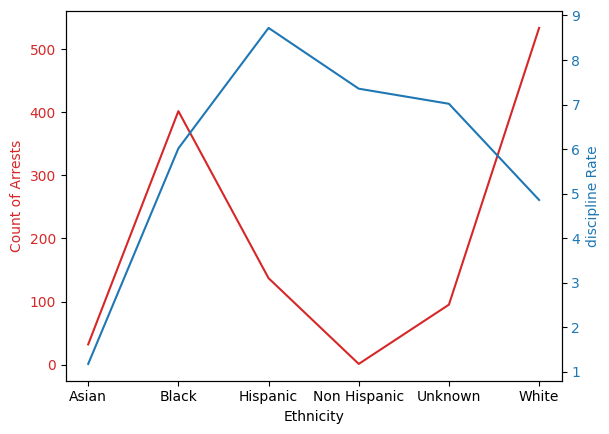

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.plot(temp.Ethnicity, temp.Charge, color )
ax1.set_ylabel('Count of Arrests', color=color ) 
ax1.tick_params(axis='y', labelcolor=color )
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(temp.Ethnicity, temp['Discipline Rate'], color)
ax2.set_ylabel('discipline Rate', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Ethnicity') 
plt.show()

In [ ]:
color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.plot(temp.Ethnicity, temp.Charge, color )
ax1.set_ylabel('Count of Arrests', color=color ) 
ax1.tick_params(axis='y', labelcolor=color )
"""ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(temp.Ethnicity, temp['Discipline Rate'], color)
ax2.set_ylabel('discipline Rate', color=color) 
ax2.tick_params(axis='y', labelcolor=color)"""
ax1.set_xlabel('Ethnicity') 
plt.show()

In [158]:
from scipy.stats.stats import pearsonr

/var/folders/dx/fphvrhr94791_b6_b5msnv2r0000gn/T/ipykernel_39289/4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [159]:
stat, p = pearsonr(temp['Charge'], temp['Discipline Rate'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('correlation is not statistically significant')
else:
 print('correlation is statistically significant')

stat=-0.041, p=0.939
correlation is not statistically significant
